# DSN competition.


## Kowope Mart is a Nigeria-Based retail company with a vision to provide quality goods, education and automobile services to its customers at affordable price and reduce if not eradicate charges on card payments and increase customer satisfaction with credit rewards that can be used within the Mall.

### Task is to predict the customers who are likely to default or not.

### A two classes classification problem.

### Business constraint: it must be well explainatory or interpretable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [2]:
train= pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train.head()

Applicant_ID  form_field1  form_field2  form_field3  form_field4  \
0  Apcnt_1000000       3436.0      0.28505       1.6560          0.0   
1  Apcnt_1000004       3456.0      0.67400       0.2342          0.0   
2  Apcnt_1000008       3276.0      0.53845       3.1510          0.0   
3  Apcnt_1000012       3372.0      0.17005       0.5050          0.0   
4  Apcnt_1000016       3370.0      0.77270       1.1010          0.0   

   form_field5  form_field6  form_field7  form_field8  form_field9  ...  \
0        0.000          0.0   10689720.0     252072.0    4272776.0  ...   
1        0.000          0.0     898979.0     497531.0    9073814.0  ...   
2        6.282          NaN     956940.0          NaN     192944.0  ...   
3        0.000     192166.0    3044703.0     385499.0    3986472.0  ...   
4        0.000       1556.0     214728.0     214728.0    1284089.0  ...   

   form_field42  form_field43  form_field44  form_field45  form_field46  \
0      0.392854          2.02      0.711632           0.0           0.0   
1      0.314281          8.08      0.183584           NaN           0.0   
2      0.162965         18.18      0.791136           0.0           0.0   
3      0.488884          2.02      0.685168           NaN           0.0   
4      0.275000         12.12      0.438168           0.0           0.0   

   form_field47  form_field48  form_field49  form_field50  default_status  
0        charge           NaN      1.129518      0.044335              no  
1        charge    349.805730      1.620483      0.322436              no  
2        charge           NaN      1.513370      0.011640             yes  
3        charge     89.940100      0.664452      0.082729              no  
4        charge     97.887502      1.427891      0.045630              no  

[5 rows x 52 columns]

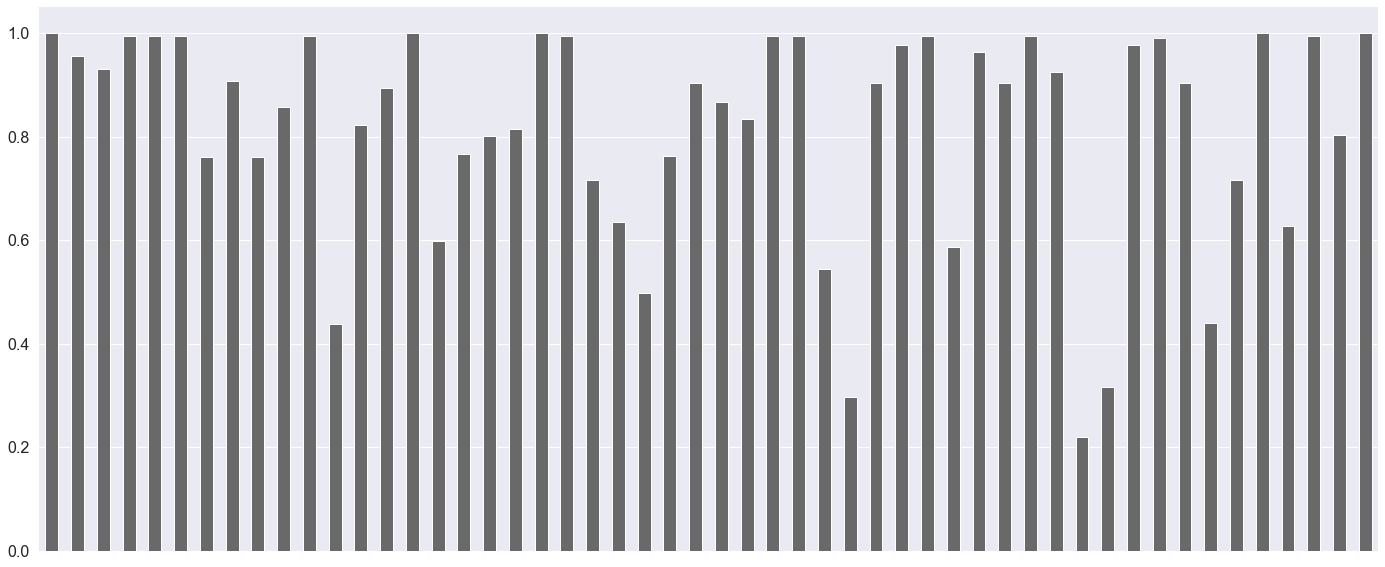

In [224]:
msno.bar(train)

In [50]:
#train.info()

In [51]:
#train.isnull().sum()

In [52]:
total = train.isnull().sum()
missing_percent = (total/train.isnull().count())*100

df_missing = pd.DataFrame({'Total_miss': total, 'missing_percent': missing_percent})
df_missing.sort_values(by='missing_percent', ascending=False)

Total_miss  missing_percent
form_field40         43729        78.087500
form_field31         39408        70.371429
form_field41         38229        68.266071
form_field11         31421        56.108929
form_field45         31317        55.923214
form_field23         28123        50.219643
form_field30         25509        45.551786
form_field35         23148        41.335714
form_field15         22475        40.133929
form_field48         20889        37.301786
form_field22         20400        36.428571
form_field46         15904        28.400000
form_field21         15854        28.310714
form_field8          13360        23.857143
form_field6          13360        23.857143
form_field24         13297        23.744643
form_field16         13036        23.278571
form_field17         11151        19.912500
form_field50         11056        19.742857
form_field18         10402        18.575000
form_field12          9895        17.669643
form_field27          9299        16.605357
form_field9           8008        14.300000
form_field26          7438        13.282143
form_field13          5889        10.516071
form_field32          5450         9.732143
form_field25          5450         9.732143
form_field37          5450         9.732143
form_field44          5383         9.612500
form_field7           5163         9.219643
form_field39          4211         7.519643
form_field2           3844         6.864286
form_field1           2529         4.516071
form_field36          1995         3.562500
form_field42          1323         2.362500
form_field33          1256         2.242857
form_field43           568         1.014286
form_field5            355         0.633929
form_field3            355         0.633929
form_field4            355         0.633929
form_field20           355         0.633929
form_field38           355         0.633929
form_field34           355         0.633929
form_field10           355         0.633929
form_field29           355         0.633929
form_field28           355         0.633929
form_field49           355         0.633929
form_field19             4         0.007143
Applicant_ID             0         0.000000
form_field47             0         0.000000
form_field14             0         0.000000
default_status           0         0.000000

In [53]:
total = test.isnull().sum()
missing_percent = (total/test.isnull().count())*100

df_miss = pd.DataFrame({'Total_miss': total, 'missing_percent': missing_percent})
df_miss.sort_values(by='missing_percent', ascending=False)

Total_miss  missing_percent
form_field40       18828        78.450000
form_field31       16810        70.041667
form_field41       16349        68.120833
form_field45       13538        56.408333
form_field11       13398        55.825000
form_field23       12125        50.520833
form_field30       10908        45.450000
form_field35        9866        41.108333
form_field15        9592        39.966667
form_field48        8922        37.175000
form_field22        8724        36.350000
form_field46        6885        28.687500
form_field21        6707        27.945833
form_field24        5605        23.354167
form_field8         5604        23.350000
form_field6         5604        23.350000
form_field16        5474        22.808333
form_field50        4797        19.987500
form_field17        4695        19.562500
form_field18        4369        18.204167
form_field12        4183        17.429167
form_field27        3910        16.291667
form_field9         3400        14.166667
form_field26        3172        13.216667
form_field13        2463        10.262500
form_field44        2362         9.841667
form_field32        2256         9.400000
form_field37        2256         9.400000
form_field25        2256         9.400000
form_field7         2231         9.295833
form_field39        1829         7.620833
form_field2         1709         7.120833
form_field1         1110         4.625000
form_field36         903         3.762500
form_field42         578         2.408333
form_field33         495         2.062500
form_field43         250         1.041667
form_field29         147         0.612500
form_field28         147         0.612500
form_field10         147         0.612500
form_field38         147         0.612500
form_field34         147         0.612500
form_field20         147         0.612500
form_field5          146         0.608333
form_field4          146         0.608333
form_field3          146         0.608333
form_field49         146         0.608333
form_field14           0         0.000000
form_field19           0         0.000000
form_field47           0         0.000000
Applicant_ID           0         0.000000

In [4]:
train.drop('form_field40', axis=1, inplace=True)
test.drop('form_field40', axis=1, inplace=True)

In [59]:
# function for visualization. 
def countplot(col):
    sns.countplot(train[col])
    
def distplot(col):
    plt.figure(figsize=(12,6))
    sns.distplot(train[col], bins=15)
    plt.show()
    
def jointplot(col):
    plt.figure(figsize=(12,6))
    sns.jointplot(col, 'default_status', data=train)
    plt.show()

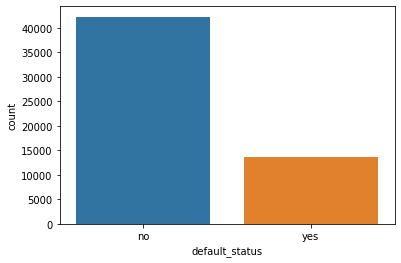

In [60]:
countplot('default_status') #imbalance dataset

In [226]:
total_target = len(train['default_status']) 
no = len(train[train['default_status'] == 'no'])
yes = len(train[train['default_status'] == 'yes'])
total_no_pct = no/total_target*100
total_yes_pct =yes/total_target*100
print('The percentage for NO in the default_status is', round(total_no_pct, 3),'%')
print('The percentage for YES in the default_status is', round(total_yes_pct, 3),'%')

The percentage for NO in the default_status is 75.509 %
The percentage for YES in the default_status is 24.491 %


In [5]:
#from sklearn.utils import resample

train['Applicant_ID'] = train['Applicant_ID'].astype('category').cat.codes
train['form_field47'] = train['form_field47'].astype('category').cat.codes
test['Applicant_ID'] = train['Applicant_ID'].astype('category').cat.codes
test['form_field47'] = train['form_field47'].astype('category').cat.codes

In [6]:
train = train.fillna(value=-999, axis=1)
train.isnull().sum().any()

False

In [7]:
test = test.fillna(value=-999, axis=1)
test.isnull().sum().any()

False

In [8]:
train['default_status'] = train['default_status'].astype('category').cat.codes
train['default_status'].value_counts()

0    42285
1    13715
Name: default_status, dtype: int64

In [9]:
train['total_form_field'] = round(train['form_field1'] + train['form_field2'] + train['form_field3'] + train['form_field4'] +\
                                train['form_field5'] + train['form_field6'] + train['form_field7'] + train['form_field8']+\
                                train['form_field9'] + train['form_field10'] + train['form_field11'] +
                                train['form_field12'] + train['form_field13'] + train['form_field14'] + train['form_field15'] +
                                train['form_field16'] + train['form_field17'] + train['form_field18'] + train['form_field19'] +
                                train['form_field20'] + train['form_field21'] + train['form_field22'] + train['form_field23'] +
                                train['form_field24'] + train['form_field25'] + train['form_field26'] + train['form_field27'] +                          
                                train['form_field28'] + train['form_field29'] + train['form_field30'] + train['form_field31'] +
                                train['form_field32'] + train['form_field33'] + train['form_field34'] + train['form_field35'] +
                                train['form_field36'] + train['form_field37'] + train['form_field38'] + train['form_field39'] +
                                train['form_field41'] + train['form_field42'] + train['form_field43'] + train['form_field44'] \
                                + train['form_field45'] + train['form_field46'] + train['form_field47'] +
                                train['form_field48'] + train['form_field49'] + train['form_field50'])

In [10]:
test['total_form_field'] = round(test['form_field1'] + test['form_field2'] + test['form_field3'] + test['form_field4'] +\
                                test['form_field5'] + test['form_field6'] + test['form_field7'] + test['form_field8']+\
                                test['form_field9'] + test['form_field10'] + test['form_field11'] +
                                test['form_field12'] + test['form_field13'] + test['form_field14'] + test['form_field15'] +
                                test['form_field16'] + test['form_field17'] + test['form_field18'] + test['form_field19'] +
                                test['form_field20'] + test['form_field21'] + test['form_field22'] + test['form_field23'] +
                                test['form_field24'] + test['form_field25'] + test['form_field26'] + test['form_field27'] +                          
                                test['form_field28'] + test['form_field29'] + test['form_field30'] + test['form_field31'] +
                                test['form_field32'] + test['form_field33'] + test['form_field34'] + test['form_field35'] +
                                test['form_field36'] + test['form_field37'] + test['form_field38'] + test['form_field39'] +
                                test['form_field41'] + test['form_field42'] + test['form_field43'] + test['form_field44'] \
                                + test['form_field45'] + test['form_field46'] + test['form_field47'] +
                                test['form_field48'] + test['form_field49'] + test['form_field50'])

In [11]:
train['total_form_field'].astype('int64')
test['total_form_field'].astype('int64')

0        166354166
1        154981713
2         22066428
3         23563592
4        141878914
           ...    
23995    154400011
23996    356929195
23997     22304315
23998     23263919
23999     81988523
Name: total_form_field, Length: 24000, dtype: int64

In [131]:
def heatmap(data):
    data_corr = data.corr()
    fig,ax = plt.subplots(figsize=(32,22))
    sns.heatmap(data_corr, cmap='BrBG', annot=True, ax=ax, fmt='.2f')
    sns.set(font_scale=1.50)
    plt.show()

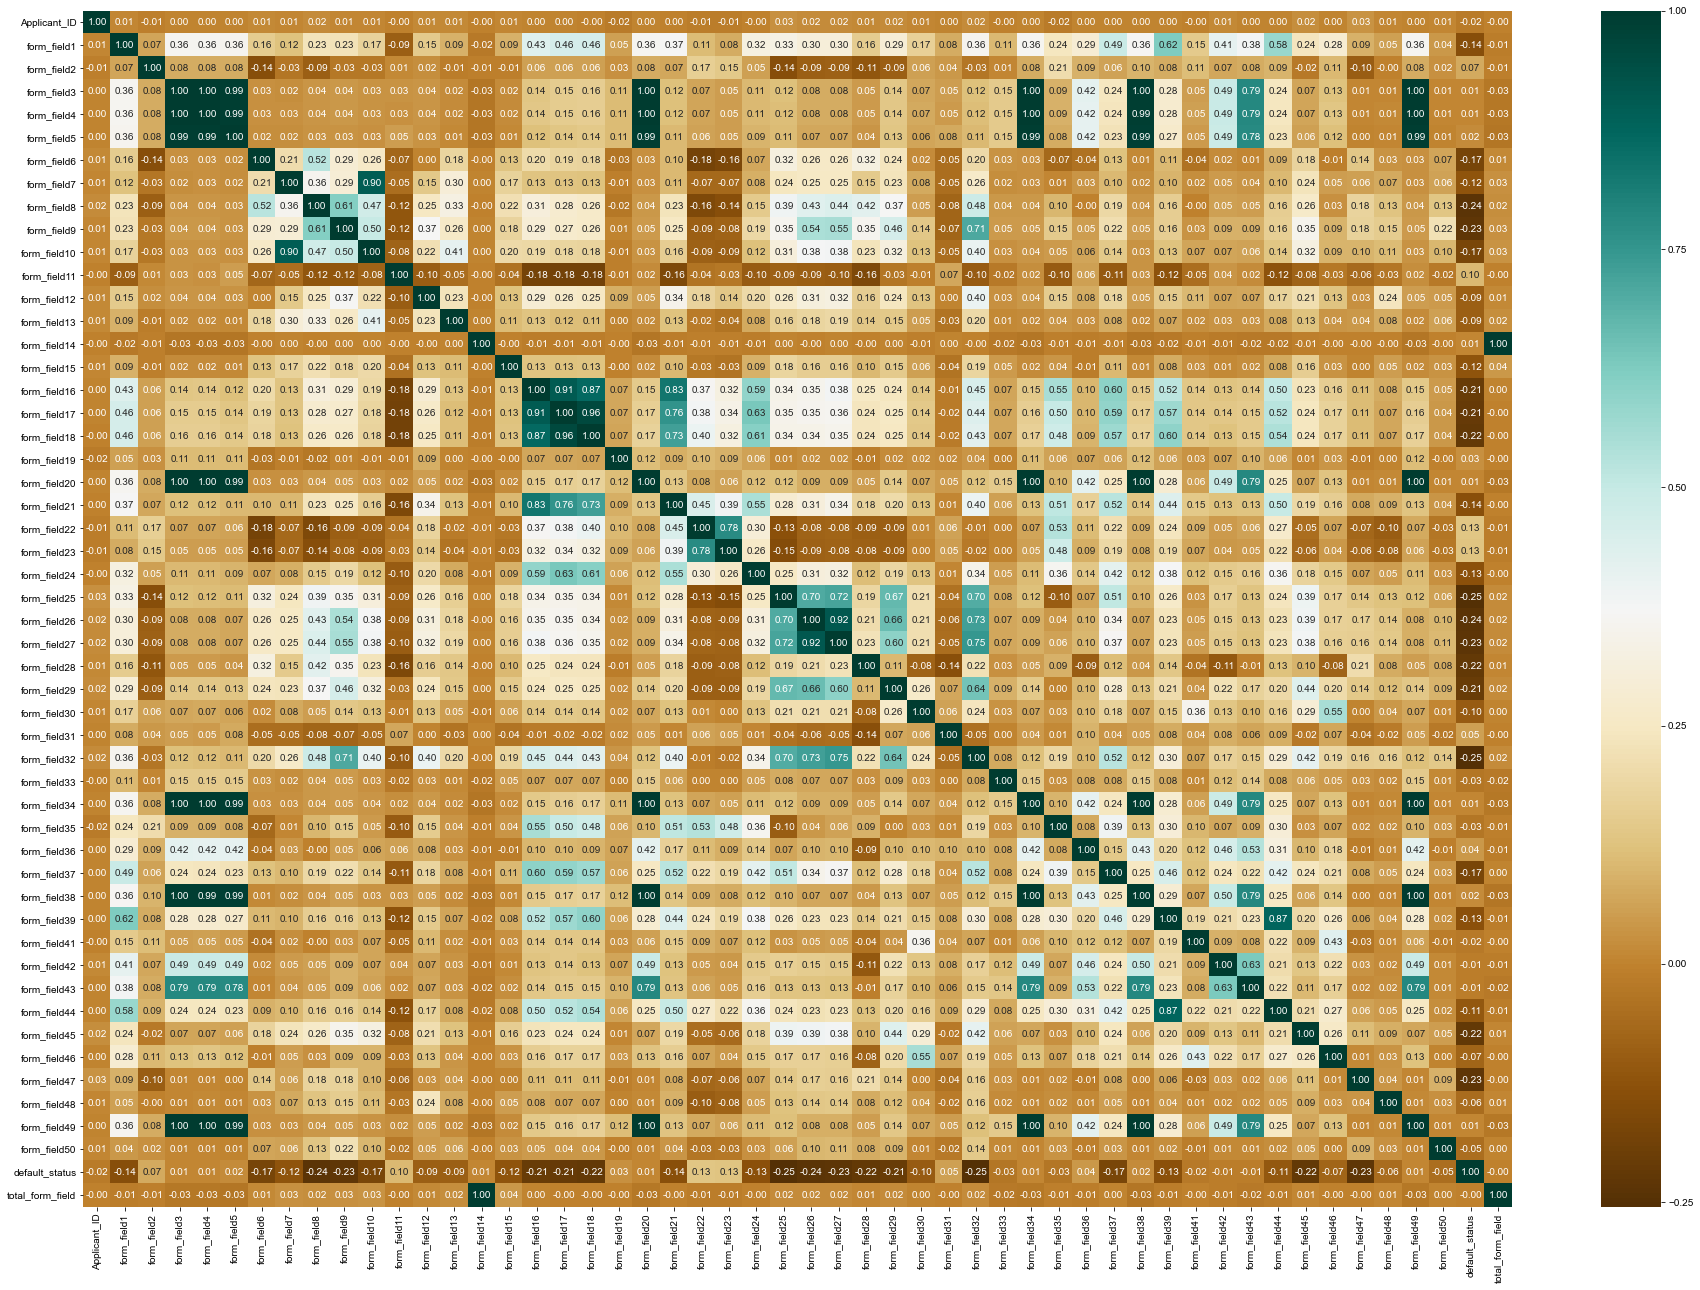

In [72]:
heatmap(train)

In [234]:
print('The dimension of the test size is', test.shape)
print('The dimension of the train size is', train.shape)

The dimension of the test size is (24000, 51)
The dimension of the train size is (56000, 52)


In [237]:
train = train.copy()
test1 = test

In [238]:
test.head()

Applicant_ID  form_field1  form_field2  form_field3  form_field4  \
0             0       3236.0      0.34875      10.2006       0.0000   
1             1       3284.0      1.27360       2.9606       9.0198   
2             2       -999.0      0.27505       0.0600       0.0000   
3             3       3232.0      0.28505       2.8032       0.0000   
4             4       3466.0      2.09545       0.8318       2.5182   

   form_field5  form_field6  form_field7  form_field8  form_field9  ...  \
0          0.0     418564.0     418564.0     418564.0     540710.0  ...   
1          0.0          0.0    9858816.0      49014.0    1510098.0  ...   
2          0.0       -999.0       -999.0       -999.0       -999.0  ...   
3          0.0          0.0     473802.0     473802.0    1724437.0  ...   
4          0.0      19839.0    1150662.0    1150662.0    7860523.0  ...   

   form_field42  form_field43  form_field44  form_field45  form_field46  \
0      0.825000          1.01      0.800000        -999.0           0.0   
1      0.507694          4.04      0.623248           1.0           0.0   
2   -999.000000          0.00   -999.000000        -999.0        -999.0   
3      0.916663          2.02      0.464224        -999.0        -999.0   
4      0.234047         23.23      0.726688           0.0           0.0   

   form_field47  form_field48  form_field49  form_field50  total_form_field  
0             0   -999.000000      0.000000      0.011221       166354166.0  
1             0   -999.000000      0.504974      0.043525       154981713.0  
2             0   -999.000000      0.000000   -999.000000        22066428.0  
3             0     90.163742      0.788809      0.104029        23563592.0  
4             0   1303.587148      1.637733      0.163124       141878914.0  

[5 rows x 51 columns]

In [14]:
X = train.drop(['default_status'], axis=1)
y = train['default_status']

In [102]:
from sklearn.model_selection import StratifiedShuffleSplit


sss = StratifiedShuffleSplit(n_splits=10, random_state=102, test_size=0.3)

for tr, tes in sss.split(X,y):
    X_train, X_test = X.iloc[tr], X.iloc[tes]
    y_train, y_test = y.iloc[tr], y.iloc[tes]


print('The shape for the train features set:', X_train.shape)
print('The shape for the target feature:', y_train.shape)
print('The shape for the test features set:', X_test.shape)
print('The shape for the test target feature', y_test.shape)

The shape for the train features set: (39200, 51)
The shape for the target feature: (39200,)
The shape for the test features set: (16800, 51)
The shape for the test target feature (16800,)


In [103]:
ratio = y_train.value_counts()/len(y_train)
ratio_test = y_test.value_counts()/len(y_test)

print('The ratio between them:', ratio)
print('The ratio_test btw them:', ratio_test)

The ratio between them: 0    0.755077
1    0.244923
Name: default_status, dtype: float64
The ratio_test btw them: 0    0.755119
1    0.244881
Name: default_status, dtype: float64


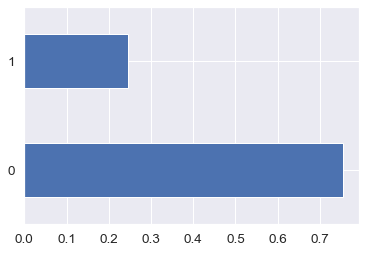

In [104]:
ratio.plot(kind='barh')

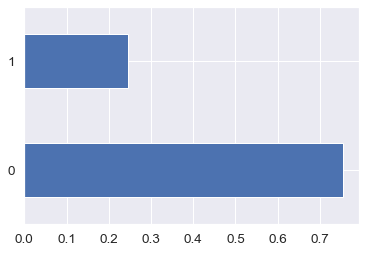

In [105]:
ratio_test.plot(kind='barh')

In [106]:
#function for precison and recall plot
from sklearn.metrics import confusion_matrix, auc, recall_score, plot_roc_curve, roc_auc_score, roc_curve

def plot_confusion_matrix(test_y, y_pred):
    C = confusion_matrix(test_y, y_pred)
    A = (((C.T)/ (C.sum(axis=1))) . T)
    B = (((C) / C.sum(axis=0)) )

    plt.figure(figsize=(20,4))

    label = [0,1]
    cmap = sns.light_palette('blue')

    plt.subplot(1, 3, 1)
    sns.heatmap(C, cmap=cmap, annot=True, fmt='.3f', xticklabels=label, yticklabels=label)
    plt.title("Confusion_Matrix")
    plt.xlabel('Predicted class')
    plt.ylabel('Original class')


    plt.subplot(1, 3, 2)
    sns.heatmap(A, cmap=cmap, annot=True, fmt='.3f', xticklabels=label, yticklabels=label)
    plt.title("Recall")
    plt.xlabel('Predicted class')
    plt.ylabel('Original class')

    plt.subplot(1, 3, 3)
    sns.heatmap(B, cmap=cmap, annot=True, fmt='.3f', xticklabels=label, yticklabels=label)
    plt.title("Precision")
    plt.xlabel('Predicted class')
    plt.ylabel('Original class')

The auc score for random model prediction: 0.5
The auc score for training in baseline model is: 0.6608784297307285
The auc score for test in baseline model is: 0.6620430148155773


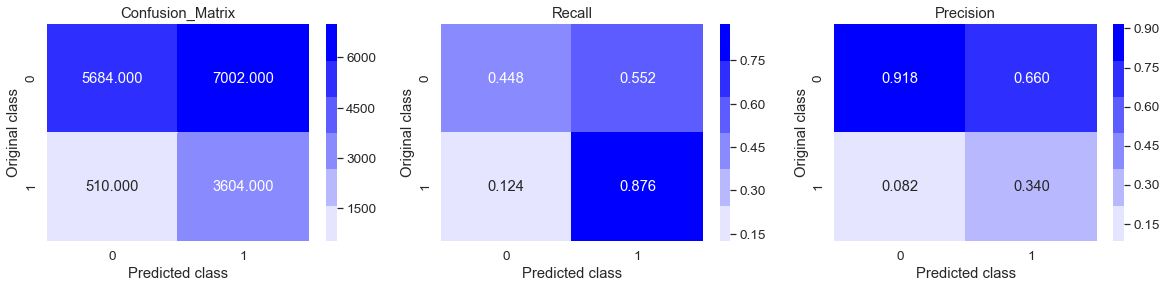

In [80]:
#random model.
random_y_pred = [0 for _ in range(len(y_test))]#majority class.

# baseline model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

y_pred_train = gnb.predict(X_train)
auc_train = roc_auc_score(y_train, y_pred_train)
auc_random = roc_auc_score(y_test, random_y_pred)
auc = roc_auc_score(y_test, y_pred)
print('The auc score for random model prediction:', auc_random)
print('The auc score for training in baseline model is:', auc_train)
print('The auc score for test in baseline model is:', auc)

#plot for the baseline model.
plot_confusion_matrix(y_test, y_pred)

In [85]:
#save the model to disk
import pickle
filename = 'basemodel.sav'
pickle.dump(gnb, open(filename, 'wb'))

#load the model from disk
#  loaded model = pickle.load(open(filename, 'rb'))

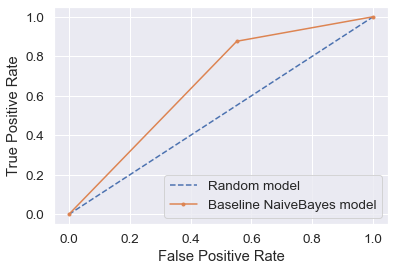

In [81]:
random_falsePositiveRate, random_truePositiveRate, _ = roc_curve(y_test, random_y_pred)
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, y_pred)

plt.plot(random_falsePositiveRate, random_truePositiveRate, linestyle= '--', label='Random model')
plt.plot(gnb_fpr, gnb_tpr, marker= '.', label='Baseline NaiveBayes model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [82]:
#robusting the data from outliers
train1 = pd.concat([X_train, y_train], axis=1).copy()
from sklearn.preprocessing import RobustScaler
robust = RobustScaler(quantile_range=(25,75))
X_t = robust.fit_transform(train1)


In [216]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10,random_state=43,shuffle=True)

for fold,(tr_in,te_in) in enumerate(kf.split(X)):
    print("=============================Fold{fold}=================================".format(fold=fold))
    X_train,X_test = X.iloc[tr_in],X.iloc[te_in]
    y_train,y_test = y.iloc[tr_in],y.iloc[te_in]

The auc score for training in baseline model is: 0.6547323109313183
The auc score for test in baseline model is: 0.6597316066066066


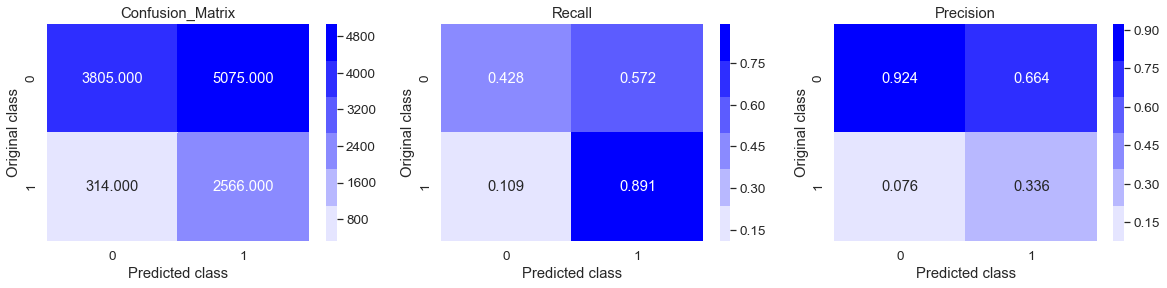

In [84]:
# baseline model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

y_pred_train = gnb.predict(X_train)
auc_train = roc_auc_score(y_train, y_pred_train)
auc = roc_auc_score(y_test, y_pred)

print('The auc score for training in baseline model is:', auc_train)
print('The auc score for test in baseline model is:', auc)

#plot for the baseline model.
plot_confusion_matrix(y_test, y_pred)

In [15]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10,random_state=43,shuffle=True)

for fold,(tr_in,te_in) in enumerate(kf.split(X)):
    print("=============================Fold{fold}=================================".format(fold=fold))
    X_train,X_test = X.iloc[tr_in],X.iloc[te_in]
    y_train,y_test = y.iloc[tr_in],y.iloc[te_in]

=============================Fold0=================================
=============================Fold1=================================
=============================Fold2=================================
=============================Fold3=================================
=============================Fold4=================================
=============================Fold5=================================
=============================Fold6=================================
=============================Fold7=================================
=============================Fold8=================================
=============================Fold9=================================


The auc score for training in baseline model is: 0.638691935902073
The auc score for test in baseline model is: 0.6368985724925114


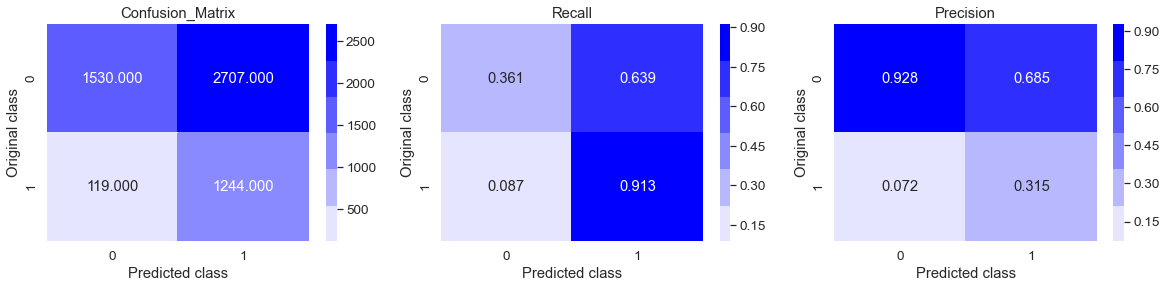

In [120]:
# baseline model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

y_pred_train = gnb.predict(X_train)
auc_train = roc_auc_score(y_train, y_pred_train)
auc = roc_auc_score(y_test, y_pred)

print('The auc score for training in baseline model is:', auc_train)
print('The auc score for test in baseline model is:', auc)

#plot for the baseline model.
plot_confusion_matrix(y_test, y_pred)

The auc score for the trained data is: 0.5758741276358851
The auc score for the tested data is: 0.564334286690409
The auc score for the trained data is: 0.5376789531194848
The auc score for the tested data is: 0.53804057502029
The auc score for the trained data is: 0.6431093176004566
The auc score for the tested data is: 0.6488553914256046
The auc score for the trained data is: 0.685075022496808
The auc score for the tested data is: 0.6923243355749952
The auc score for the trained data is: 0.7640473977239549
The auc score for the tested data is: 0.6974472517983021
The auc score for the trained data is: 0.7469618074469336
The auc score for the tested data is: 0.6934761042841155


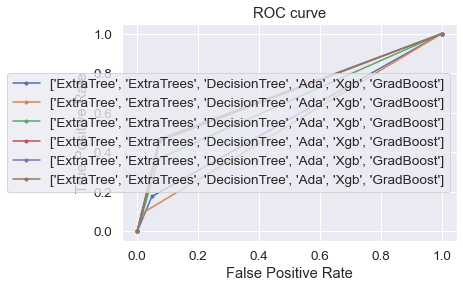

In [110]:
#loop ensemble

from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
import xgboost as xgb

names = ["ExtraTree", "ExtraTrees", "DecisionTree", "Ada", "Xgb", "GradBoost"]
clfs = [
    ExtraTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=300, max_depth=5),
    DecisionTreeClassifier(max_depth=5),
    AdaBoostClassifier(n_estimators=200),
    xgb.XGBClassifier(n_estimators=200, nthread=-1, max_depth=6),
    GradientBoostingClassifier(n_estimators=200, max_depth=5)
]

plt.figure()
for name, clf in zip(names, clfs):
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    print('The auc score for the trained data is:', roc_auc_score(y_train, y_pred_train))
    print('The auc score for the tested data is:', roc_auc_score(y_test, y_pred))
    gnb_fpr, gnb_tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(gnb_fpr, gnb_tpr, marker= '.', label=names)

plt.title("ROC curve")    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

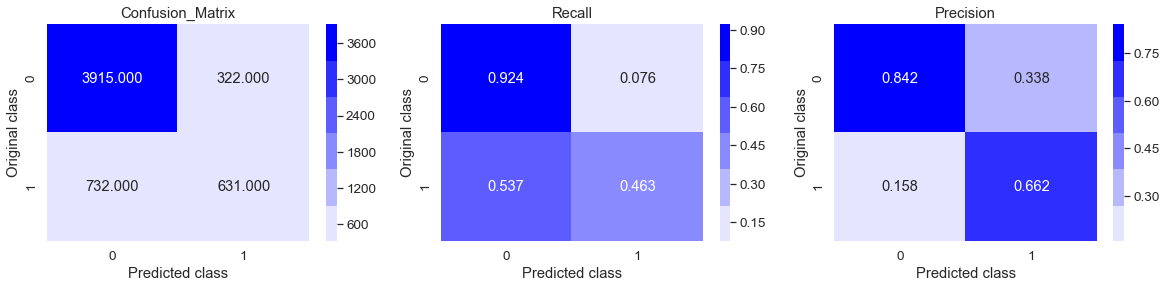

In [111]:
plot_confusion_matrix(y_test, y_pred)

In [112]:
test_pred = clf.predict(test)

In [113]:
sub = pd.read_csv('SampleSubmission.csv')

sub.default_status = test_pred
sub.head()

sub.to_csv('no1.csv', index=False) # score = 0.66

In [114]:
import lightgbm as lgb
light = lgb.LGBMClassifier(n_estimators=400, num_leaves=28, max_depth=5)
light.fit(X_train, y_train)
y_predict = light.predict(X_test)
y_predict_train = light.predict(X_train)
auc_train = roc_auc_score(y_train, y_predict_train)
auc_test = roc_auc_score(y_test, y_predict)
print('The auc score for the trained data is:',auc_train)
print('The auc score for the tested data is:', auc_test)

The auc score for the trained data is: 0.7806013102620306
The auc score for the tested data is: 0.6959131474792084


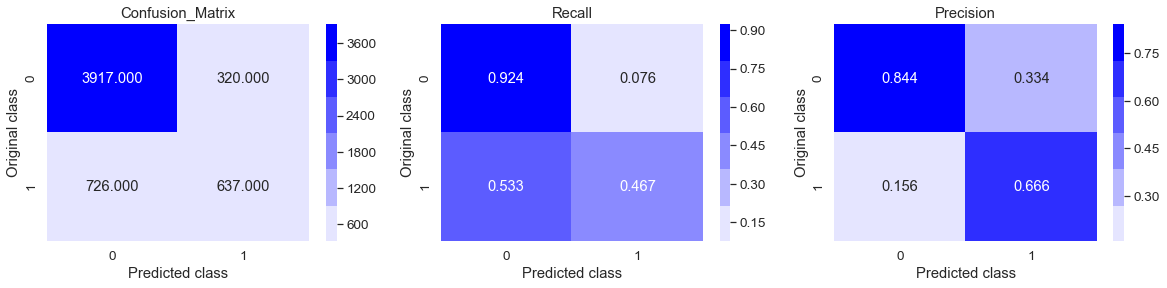

In [115]:
plot_confusion_matrix(y_test, y_predict)

In [116]:
def feature_imp(model, df):
    return pd.DataFrame({'col': X.columns, 'imp': model.feature_importances_}).sort_values(by='imp', ascending=False)

In [177]:
f = feature_imp(light, X); f

col  imp
1        form_field1  489
2        form_field2  434
0       Applicant_ID  416
33      form_field33  383
29      form_field29  345
51  total_form_field  302
42      form_field42  284
44      form_field44  272
9        form_field9  250
7        form_field7  249
13      form_field13  248
11      form_field11  243
25      form_field25  241
10      form_field10  224
8        form_field8  222
3        form_field3  220
14      form_field14  218
27      form_field27  214
21      form_field21  213
50      form_field50  210
30      form_field30  207
24      form_field24  206
15      form_field15  205
6        form_field6  204
26      form_field26  200
12      form_field12  197
36      form_field36  195
32      form_field32  193
43      form_field43  191
22      form_field22  186
38      form_field38  182
48      form_field48  162
31      form_field31  159
23      form_field23  143
41      form_field41  137
49      form_field49  136
4        form_field4  133
40      form_field40  133
37      form_field37  125
47      form_field47  116
28      form_field28  109
5        form_field5  102
34      form_field34   84
45      form_field45   72
35      form_field35   64
20      form_field20   54
19      form_field19   47
46      form_field46   37
17      form_field17   37
18      form_field18   36
39      form_field39   24
16      form_field16   17

In [16]:
#feature engineering

data = pd.concat([X_train, y_train], axis=1)

data['form_field1&form_field2'] = data['form_field1'] - data['form_field2']
data['form_field1+form_field2'] = data['form_field1'] + data['form_field2']
data['total_form_field/form_field1'] = data['total_form_field'] - data['form_field1']
data['total_form_field/form_field2'] = data['total_form_field'] - data['form_field2']
data['total_form_field/form_field33'] = data['total_form_field'] - data['form_field33']
data['form_field26+form_field6'] = data['form_field26']+data['form_field26']
data['total-form_field6'] = data['total_form_field'] - data['form_field26']
data['total-form_field6'] = data['total_form_field'] - data['form_field6']
data['total-form_field33'] = data['total_form_field'] - data['form_field33']
data['field4&field5&field3'] = data['form_field3'] + data['form_field4'] + data['form_field5']
data['field4&field5&field3'] = data['form_field3'] - data['form_field4'] - data['form_field5']
data['total_form_field/form_field1'] = data['total_form_field'] + data['form_field1']
data['total_form_field/form_field2'] = data['total_form_field']  + data['form_field2']
data['total_form_field/form_field33'] = data['total_form_field'] + data['form_field33']

In [17]:
test['form_field1&form_field2'] = test['form_field1'] - test['form_field2']
test['form_field1+form_field2'] = test['form_field1'] + test['form_field2']
test['total_form_field/form_field1'] = test['total_form_field'] - test['form_field1']
test['total_form_field/form_field2'] = test['total_form_field'] - test['form_field2']
test['total_form_field/form_field33'] = test['total_form_field'] - test['form_field33']
test['form_field26+form_field6'] = test['form_field26']+test['form_field26']
test['total-form_field6'] = test['total_form_field'] - test['form_field26']
test['total-form_field6'] = test['total_form_field'] - test['form_field6']
test['total-form_field33'] = test['total_form_field'] - test['form_field33']
test['field4&field5&field3'] = test['form_field3'] + test['form_field4'] + test['form_field5']
test['field4&field5&field3'] = test['form_field3'] - test['form_field4'] - test['form_field5']
test['total_form_field/form_field1'] = test['total_form_field'] + test['form_field1']
test['total_form_field/form_field2'] = test['total_form_field'] + test['form_field2']
test['total_form_field/form_field33'] = test['total_form_field'] + test['form_field33']

In [18]:
data.to_csv('Train(1).csv', index=False)

In [19]:
test.to_csv('Test(1).csv', index=False)

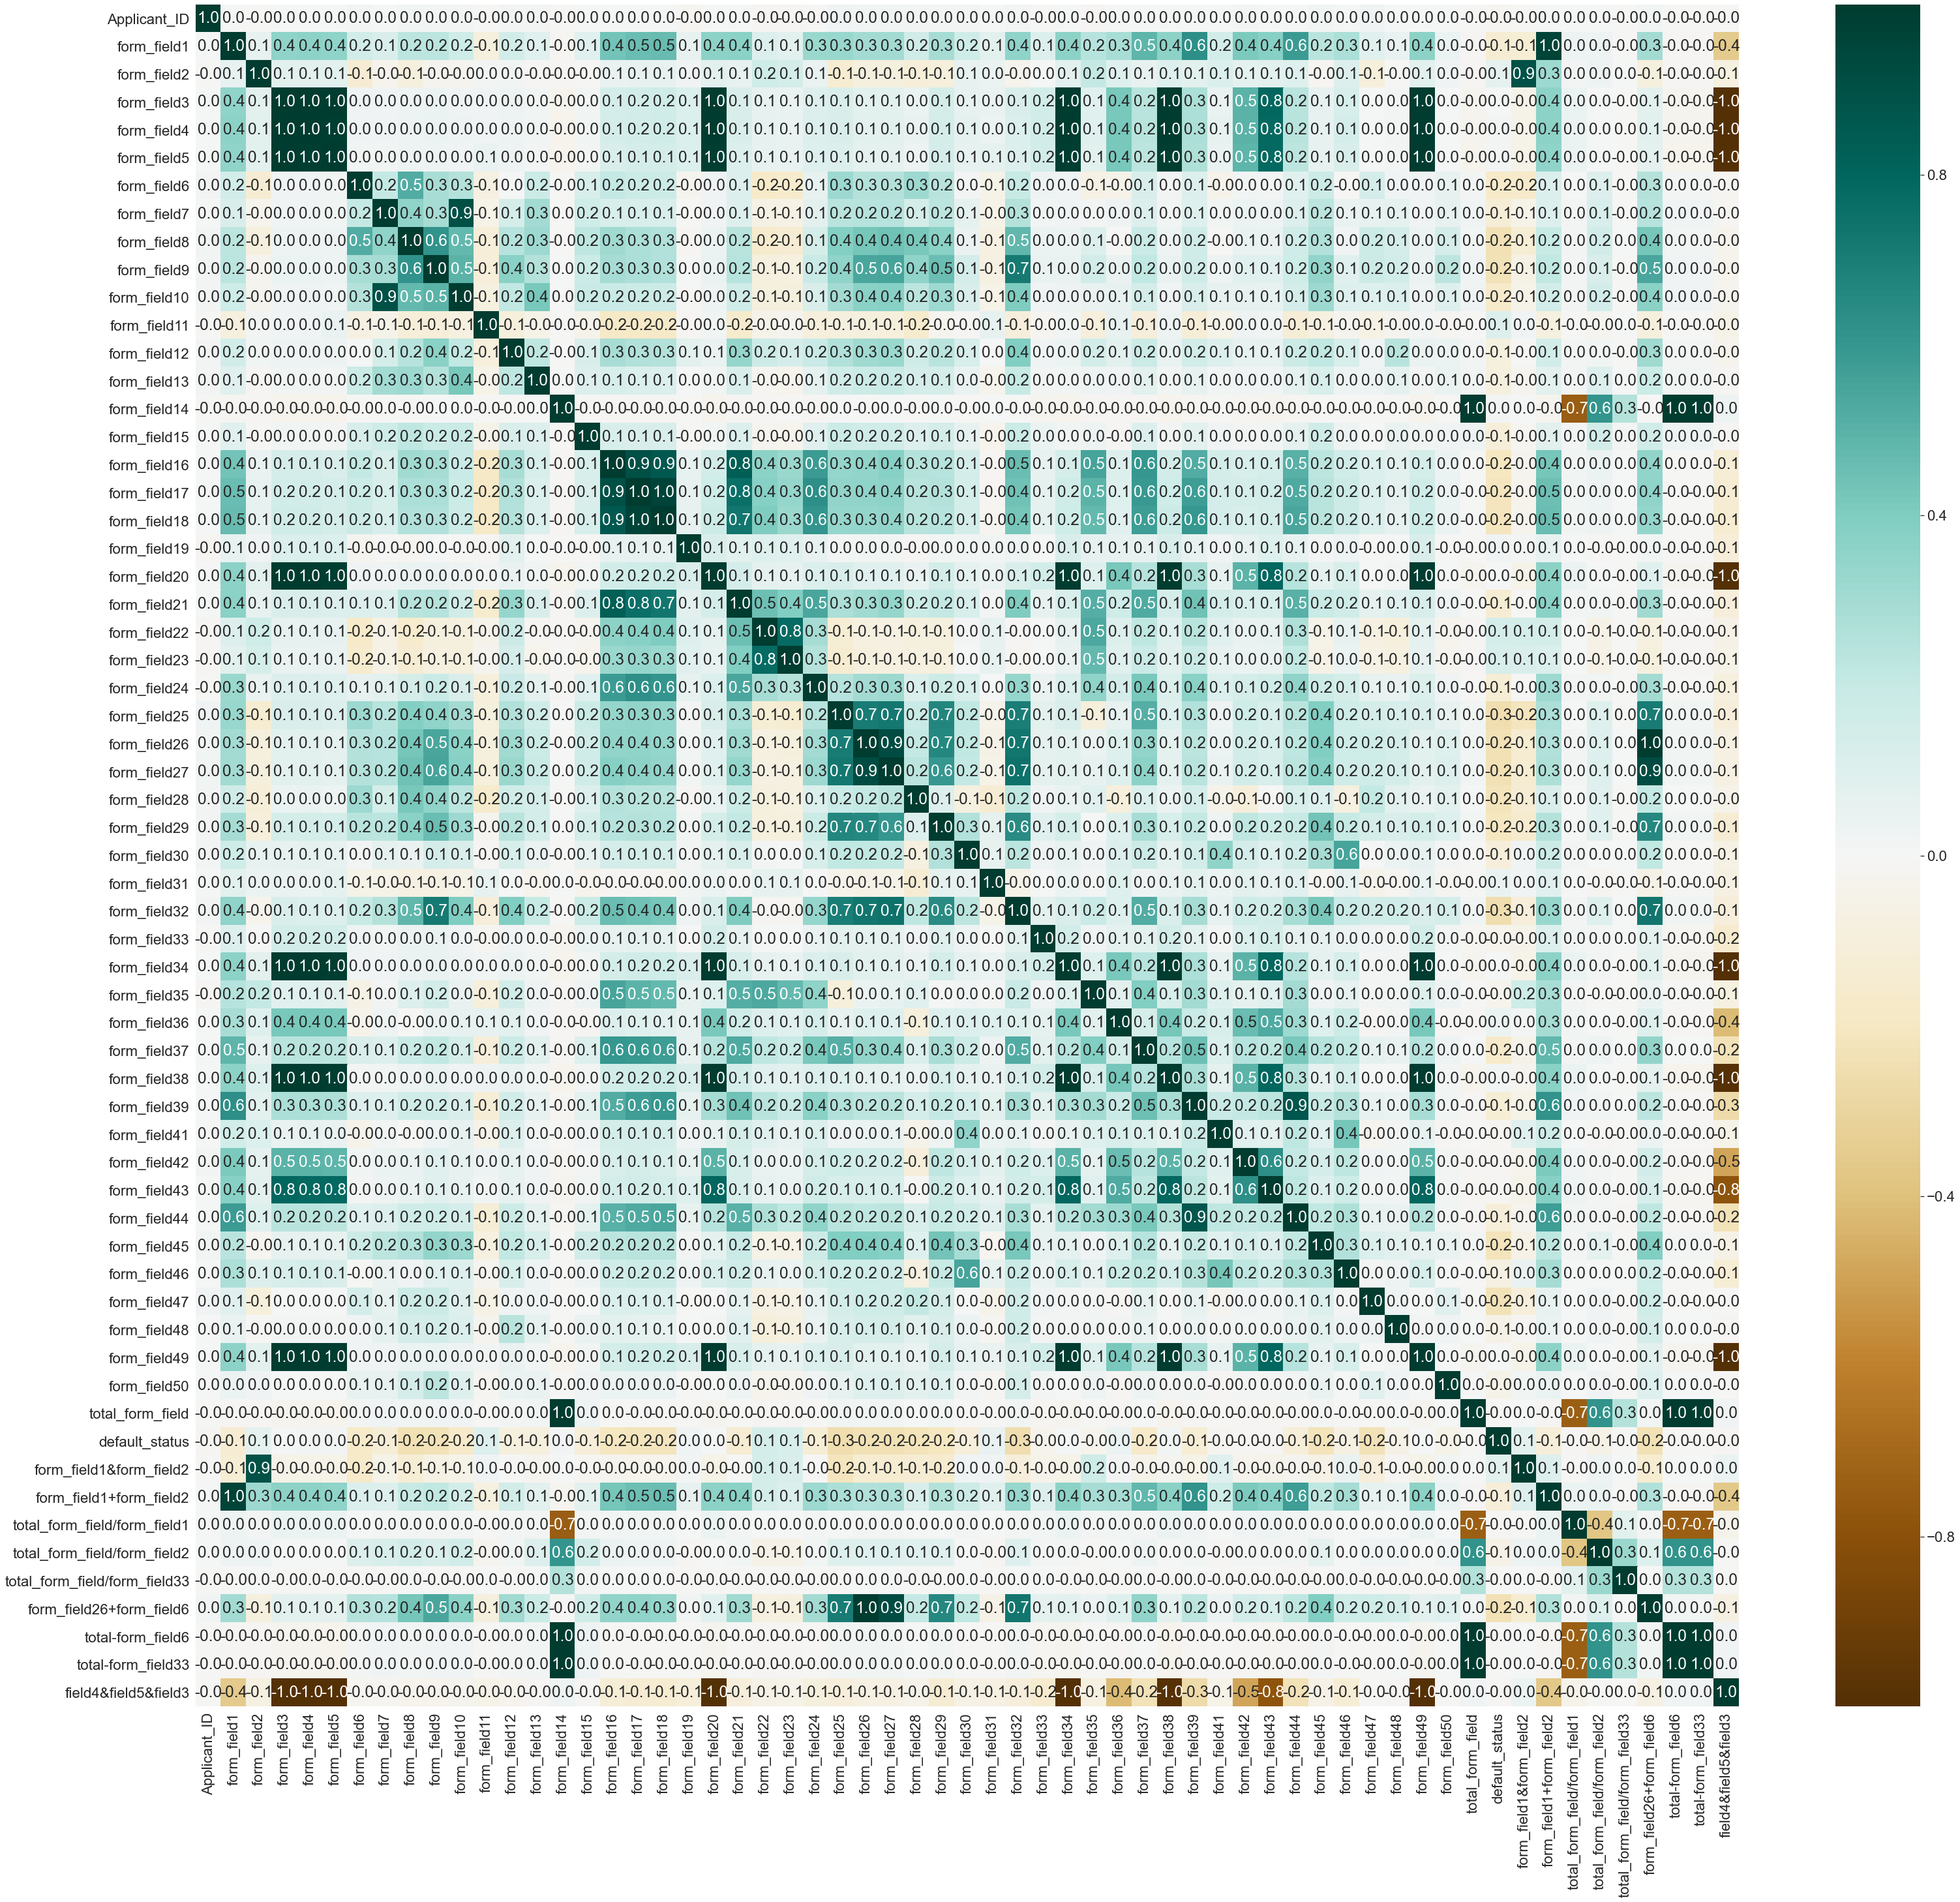

In [152]:
data_corr = data.corr()
fig,ax = plt.subplots(figsize=(53,48))
sns.heatmap(data_corr, cmap='BrBG', annot=True, ax=ax, fmt='.1f')
sns.set(font_scale=2.03)
plt.show()

In [243]:
#upsample the imbalance target

from sklearn.utils import resample
df_min = data[data['default_status']==1]
df_maj = data[data['default_status']==0]

df_min_up = resample(df_min, replace=True, n_samples=20844, random_state=123)
df_upsampled = pd.concat([df_maj, df_min_up])
df_upsampled['default_status'].value_counts()

0    38048
1    20844
Name: default_status, dtype: int64

In [244]:
#dropping some zero features with the target

data = df_upsampled.copy()

data.drop(['form_field3', 'form_field4', 'form_field5', 'form_field14', 'form_field19', 'form_field34', 'form_field36', 'form_field38', 'form_field49'], axis=1, inplace=True)
cleaned_data = data.copy()
cleaned_data.head()

Applicant_ID  form_field1  form_field2  form_field6  form_field7  \
0             0       3436.0      0.28505          0.0   10689720.0   
1             1       3456.0      0.67400          0.0     898979.0   
3             3       3372.0      0.17005     192166.0    3044703.0   
4             4       3370.0      0.77270       1556.0     214728.0   
5             5       3724.0   -999.00000     192944.0    9244585.0   

   form_field8  form_field9  form_field10  form_field11  form_field12  ...  \
0     252072.0    4272776.0    11333126.0     4397256.0     2301324.0  ...   
1     497531.0    9073814.0     2533168.0      244292.0     3982971.0  ...   
3     385499.0    3986472.0     3621979.0        -999.0      771776.0  ...   
4     214728.0    1284089.0      361770.0      396391.0      818456.0  ...   
5    6761209.0   67963357.0    32902009.0        -999.0      976390.0  ...   

   default_status  form_field1&form_field2  form_field1+form_field2  \
0               0             9.794318e+02               3436.28505   
1               0             2.329344e+03               3456.67400   
3               0             5.734086e+02               3372.17005   
4               0             2.603999e+03               3370.77270   
5               0            -3.720276e+06               2725.00000   

   total_form_field/form_field1  total_form_field/form_field2  \
0                  72681.378056                  8.761032e+08   
1                  26840.032986                  1.376249e+08   
3                  58630.654508                  1.162614e+09   
4                  14036.748071                  6.121890e+07   
5                  36732.582707                 -1.369291e+05   

   total_form_field/form_field33  form_field26+form_field6  total-form_field6  \
0                   3.121665e+07                   34128.0        249733215.0   
1                   5.300523e+06                   26826.0         92759154.0   
3                   2.523841e+07                    8028.0        197510401.0   
4                   4.730384e+07                    6570.0         47302285.0   
5                   4.412650e+06                   44166.0        136599194.0   

   total-form_field33  field4&field5&field3  
0        2.497332e+08                1.6560  
1        9.275914e+07                0.2342  
3        1.977026e+08                0.5050  
4        4.730384e+07                1.1010  
5        1.367921e+08                0.0000  

[5 rows x 52 columns]

In [246]:
test.drop(['form_field3', 'form_field4', 'form_field5', 'form_field14', 'form_field19', 'form_field34', 'form_field36', 'form_field38', 'form_field49'], axis=1, inplace=True)

In [249]:
X = cleaned_data.drop(['default_status'], axis=1)
y= cleaned_data['default_status']

In [250]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10,random_state=43,shuffle=True)

for fold,(tr_in,te_in) in enumerate(kf.split(X)):
    print("=============================Fold{fold}=================================".format(fold=fold))
    X_train,X_test = X.iloc[tr_in],X.iloc[te_in]
    y_train,y_test = y.iloc[tr_in],y.iloc[te_in]

=============================Fold0=================================
=============================Fold1=================================
=============================Fold2=================================
=============================Fold3=================================
=============================Fold4=================================
=============================Fold5=================================
=============================Fold6=================================
=============================Fold7=================================
=============================Fold8=================================
=============================Fold9=================================


In [404]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'learning_rate': 0.01,
    'num_leaves': 255,
    'max_depth': 8,
    'max_bin': 100,
    'min_child_samples':100,
    'subsample': 0.8,
    'subsample_freq': 1,
    'colsample_bytree':0.7,
    'min_child_weight':0,
    'subsample_for_bin': 200000,
    'min_split_gain':0,
    'reg_alpha':0,
    'reg_lambda': 0,
    'verbose': 2,
    'scale_pos_weight':99
}

dtrain = lgb.Dataset(X_train, label=y_train)
dvalid = lgb.Dataset(X_test, label=y_test)

In [411]:
evals_results = {}
print('Training the model...')
lgb_model = lgb.train(params, dtrain, valid_sets=[dtrain, dvalid], valid_names=['train', 'valid'], evals_result=evals_results,\
                     num_boost_round=500, early_stopping_rounds=30, verbose_eval=2, feval=None)

Training the model...
Training until validation scores don't improve for 30 rounds
[2]	train's auc: 0.824722	valid's auc: 0.820056
[4]	train's auc: 0.833688	valid's auc: 0.825661
[6]	train's auc: 0.838495	valid's auc: 0.830129
[8]	train's auc: 0.841125	valid's auc: 0.831382
[10]	train's auc: 0.841734	valid's auc: 0.830942
[12]	train's auc: 0.841831	valid's auc: 0.831091
[14]	train's auc: 0.844796	valid's auc: 0.833467
[16]	train's auc: 0.844518	valid's auc: 0.833674
[18]	train's auc: 0.845751	valid's auc: 0.83475
[20]	train's auc: 0.846075	valid's auc: 0.835203
[22]	train's auc: 0.84575	valid's auc: 0.834816
[24]	train's auc: 0.846899	valid's auc: 0.835357
[26]	train's auc: 0.846965	valid's auc: 0.835034
[28]	train's auc: 0.846444	valid's auc: 0.834651
[30]	train's auc: 0.846515	valid's auc: 0.834509
[32]	train's auc: 0.846663	valid's auc: 0.834791
[34]	train's auc: 0.846899	valid's auc: 0.834716
[36]	train's auc: 0.846613	valid's auc: 0.834526
[38]	train's auc: 0.846763	valid's auc: 0

[330]	train's auc: 0.867747	valid's auc: 0.847846
[332]	train's auc: 0.86785	valid's auc: 0.84797
[334]	train's auc: 0.867998	valid's auc: 0.848103
[336]	train's auc: 0.86813	valid's auc: 0.848163
[338]	train's auc: 0.868245	valid's auc: 0.848224
[340]	train's auc: 0.868408	valid's auc: 0.848331
[342]	train's auc: 0.868469	valid's auc: 0.848337
[344]	train's auc: 0.868613	valid's auc: 0.848466
[346]	train's auc: 0.868742	valid's auc: 0.848573
[348]	train's auc: 0.86884	valid's auc: 0.848556
[350]	train's auc: 0.868899	valid's auc: 0.848682
[352]	train's auc: 0.869015	valid's auc: 0.848793
[354]	train's auc: 0.8691	valid's auc: 0.848832
[356]	train's auc: 0.869186	valid's auc: 0.848871
[358]	train's auc: 0.869326	valid's auc: 0.848972
[360]	train's auc: 0.869354	valid's auc: 0.849027
[362]	train's auc: 0.869508	valid's auc: 0.849103
[364]	train's auc: 0.869594	valid's auc: 0.849117
[366]	train's auc: 0.869745	valid's auc: 0.849198
[368]	train's auc: 0.869921	valid's auc: 0.84938
[370]	t

In [307]:
#feature names:
print('Feature importance:', list(lgb_model.feature_importance()))

Feature importance: [13955, 10840, 9421, 8797, 9485, 7458, 8567, 8410, 6802, 7718, 9243, 7314, 523, 801, 1120, 2900, 7596, 6462, 4885, 7501, 9864, 7725, 7585, 6145, 11100, 8493, 4926, 8243, 10617, 1433, 5187, 595, 4509, 8738, 5576, 11039, 1659, 982, 2699, 6438, 9438, 6143, 7675, 8512, 5804, 9722, 10448, 2284, 4126, 1361, 7043]


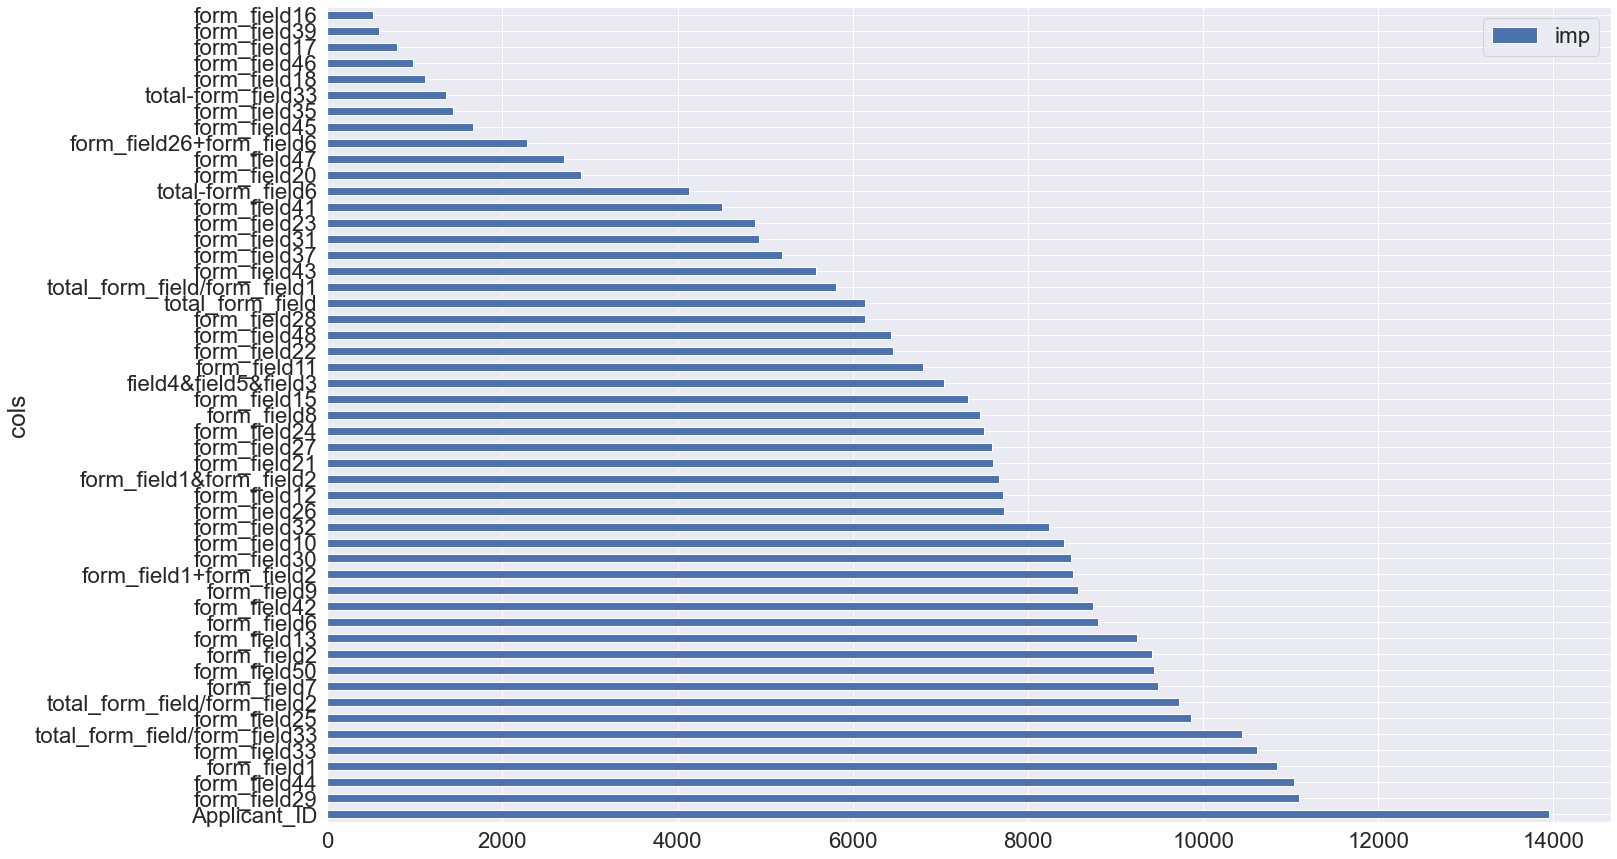

In [308]:
pd.DataFrame({'cols': lgb_model.feature_name(),\
              'imp': lgb_model.feature_importance()}).sort_values(by='imp',ascending=False).plot('cols', 'imp', kind='barh', figsize=(23,15))

In [412]:
y_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
print('The AUC test score:', roc_auc_score(y_test, y_pred))

The AUC test score: 0.8558616362063658


The total number of points: 5889


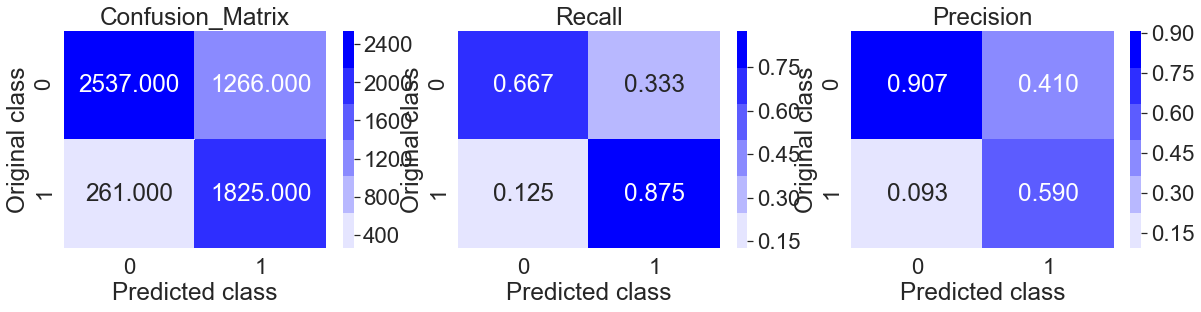

In [413]:
predicted_y = np.array(y_pred>0.965, dtype=int)
print('The total number of points:', len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [414]:
test_pred = lgb_model.predict(test)

In [415]:
sub = pd.read_csv('SampleSubmission.csv')

sub['default_status'] = test_pred
sub.to_csv('no6.csv',index=False)

In [410]:
sub = pd.read_csv('SampleSubmission.csv')

sub['default_status'] = test_pred
sub.to_csv('no5.csv',index=False)# 0.802

In [312]:
sub = pd.read_csv('SampleSubmission.csv')

sub['default_status'] = test_pred
sub.to_csv('no4.csv',index=False) # 0.799

In [304]:
sub = pd.read_csv('SampleSubmission.csv')

sub['default_status'] = test_pred
sub.to_csv('no3.csv',index=False)# 0.796

In [296]:
sub = pd.read_csv('SampleSubmission.csv')

sub['default_status'] = test_pred
sub.to_csv('no2.csv',index=False)# 0.8021

In [324]:
data = pd.concat([X_train, y_train], axis=1)